In [1]:
%%html
<style>
table {
    margin-left: 30pt !important;
    margin-right: auto !important;
    display: block;
}
</style>

<a id='top'></a>
# Code to generate Figure panels related to Figure 2

#### Goldschmidt et al. 2026, "Recent experience and internal state shape local search strategies in flies"
---

<a id='toc'></a>
## Table of Contents

- [Imports](#imports)
- [Figure 2](#figure-2)

| Figure Panel  | Title | Status |
| ------------- | ------------- | :-----------: |
| [Fig. 2B](#fig-2b)  | Bimodal distribution of log-transformed, normalized trip lengths for 24-h-starved wildtype flies |✅|
| [Fig. 2C](#fig-2c)  | Distribution of log-transformed trip lengths for short (purple) and long (teal) trips for 24-h-starved wildtype flies |✅|
| [Fig. 2D](#fig-2d)  | Distribution of log-transformed trip lengths for short (purple) and long (teal) trips for 24- and 40-h-starved wildtype flies   |✅|
| [Fig. 2E](#fig-2e)  | Probability of long trips as a function of trip index  |✅|
| [Fig. 2F](#fig-2f)  | Strip- and boxplot of trip durations binned according to trip index for short (purple) and long (teal) trips for 24-h-starved flies |✅|
| [Fig. 2G](#fig-2g)  | Strip- and boxplot of the normalized cumulative feeding duration at the start of a trip, binned by trip index  |✅|
| [Fig. 2H](#fig-2h)  | Scatterplot version of F, with points from short and long trips color-coded for 24-h-starved flies  |✅|
| [Fig. 2I](#fig-2i)  | Scatterplot version of F, with points from short and long trips color-coded for 40-h-starved flies  |✅|

- [Supplemental Figure 2](#figure-s2)

| Figure Panel  | Title | Status |
| ------------- | ------------- | :-----------: |
| [Fig. S2A](#fig-2b)  | Bimodal distribution of log-transformed, normalized trip lengths for 40-h-starved wildtype flies  |✅|
| [Fig. S2B](#fig-2c)  | Distribution of log-transformed trip lengths for short (purple) and long (teal) trips for 40-h-starved wildtype flies |✅|
| [Fig. S2C](#fig-2f)  | Strip- and boxplot of trip durations binned according to trip index for short (purple) and long (teal) trips for 40-h-starved flies  |✅|
| [Fig. S2D](#fig-2f)  | Strip- and boxplot of trip durations binned according to trip index for short (purple) and long (teal) trips for only loops  |✅|
| [Fig. S2E](#fig-2e)  |  Probability of long trips as a function of trip index but only considering loops  |✅|
| [Fig. S2F](#fig-s2f)  | Strip- and boxplot of normalized feeding durations visualized as in Fig. 2G but for 40-h-starved flies  |✅|
| [Fig. S2G](#fig-s2g)  | Linear regression plot of the log-transformed trip lengths as a function of log-transformed visit durations  |✅|
| [Fig. S2H](#fig-s2h)  | Probability of long trips as a function of the log-transformed, previous visit duration  |✅|

<a id='imports'></a>
## Imports

In [1]:
import os
import os.path as op
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import platform

import matplotlib.pyplot as plt
import seaborn as sns
from src.interface import combine_yaml
from src.per_trips import get_trip_df, extractGaussianIntersects, fitGMM
from src.viz import myAxisTheme, plotGMM, plot_trip_distribution_fit, stripWithBoxplot_color, cond_color, trip_color, trip_color_vs

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
%config Completer.use_jedi = False

## Loading per-frame data and metadata
We are loading feather and yaml files for the per-frame tracking data and metadata of given conditions (e.g., genotype, nutrient spot, etc.). The datasets are not contained in this repository, but have to be hooked in. 

In [2]:
rootDir = '/Users/hannahhaberkern/Dropbox/LocalSearchData/data/'
rootDir = '/Users/golddenn/Dropbox/LocalSearchData/data/'
groupName = 'CantonSMH'

groups = {
    'CantonSMH': ['JR_CantonSMH_single_dark_5ul_perframe_0-125M_24hr',
        'JR_CantonSMH_single_dark_5ul_perframe_0-125M_40hr',
        'JR_CantonSMH_single_dark_5ul_perframe_0M_24hr',
        'JR_CantonSMH_single_dark_5ul_perframe_0M_40hr'],
}
myfiles = groups[groupName]
plotDir = op.join('plt', groupName)
os.makedirs(plotDir, exist_ok=True)

allData_df = pd.concat([pd.read_feather(rootDir + f+'.feather') for f in myfiles], ignore_index=True)
genotype = list(allData_df.genotype.unique())
conditions = list(allData_df.condition.unique())
all_metadata = combine_yaml([rootDir + f+'.yaml' for f in myfiles])
print(genotype)
print(allData_df.columns)

['CantonSMH']
Index(['fly', 'condition', 'genotype', 'frame', 'dt', 'time', 'body_x',
       'body_y', 'head_x', 'head_y', 'angle', 'major', 'minor', 'body_speed',
       'head_speed', 'angular_speed', 'curvature', 'ethogram', 'segment'],
      dtype='object')


## Generate Trip Dataframe

In [3]:
per_trip_df = get_trip_df(allData_df, all_metadata)
per_trip_df.head()

  0%|          | 0/28 [00:00<?, ?it/s]

/Users/golddenn/Documents/GitHub/2026-goldschmidt-et-al-currbiol/src/per_trips.py:92: RuntimeWarning: invalid value encountered in divide
  norm_cumul_feeding = np.cumsum(dt*feeding)/np.sum(dt*feeding)


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

/Users/golddenn/Documents/GitHub/2026-goldschmidt-et-al-currbiol/src/per_trips.py:92: RuntimeWarning: invalid value encountered in divide
  norm_cumul_feeding = np.cumsum(dt*feeding)/np.sum(dt*feeding)
/Users/golddenn/Documents/GitHub/2026-goldschmidt-et-al-currbiol/src/per_trips.py:92: RuntimeWarning: invalid value encountered in divide
  norm_cumul_feeding = np.cumsum(dt*feeding)/np.sum(dt*feeding)
/Users/golddenn/Documents/GitHub/2026-goldschmidt-et-al-currbiol/src/per_trips.py:92: RuntimeWarning: invalid value encountered in divide
  norm_cumul_feeding = np.cumsum(dt*feeding)/np.sum(dt*feeding)


,fly,flyid,condition,trip_index,time,cumul_feeding,norm_cumul_feeding,duration,length,runturnsegs,previsit_duration,isloop,postvisit_duration,scaled_duration,scaled_length,scaled_duration_loop,scaled_length_loop,scaled_previsit_duration,scaled_postvisit_duration
0,bias_video_cam_0_date_2019_06_05_time_18_12_19...,fly01,0-125M_24hr,0.0,490.819323,457.464296,0.459695,1.459282,2.372612,2.0,490.819323,1.0,170.736107,0.043409,0.023971,0.151609,0.056557,18.612591,7.093541
1,bias_video_cam_0_date_2019_06_05_time_18_12_19...,fly01,0-125M_24hr,1.0,663.014712,625.365226,0.628415,3.127035,8.408593,6.0,170.736107,1.0,4.544624,0.093020,0.084952,0.324876,0.200439,6.474565,0.188815
2,bias_video_cam_0_date_2019_06_05_time_18_12_19...,fly01,0-125M_24hr,2.0,670.686371,629.534605,0.632604,1.542671,2.424860,4.0,4.544624,1.0,12.925078,0.045890,0.024498,0.160272,0.057802,0.172339,0.536996
3,bias_video_cam_0_date_2019_06_05_time_18_12_19...,fly01,0-125M_24hr,3.0,685.154120,641.459031,0.644587,4.878175,9.111110,7.0,12.925078,1.0,13.550485,0.145112,0.092050,0.506807,0.217185,0.490138,0.562979
4,bias_video_cam_0_date_2019_06_05_time_18_12_19...,fly01,0-125M_24hr,4.0,703.582780,654.217336,0.657407,1.459283,1.358749,4.0,13.550485,1.0,84.388253,0.043410,0.013727,0.151609,0.032389,0.513854,3.506063


## Classify trips into long vs short based on extracted thresholds

In [4]:
qOIs = ['duration','scaled_duration','scaled_duration_loop','length', 'scaled_length','scaled_length_loop']
qSlct = 4
condsOI = conditions
segThr = 5
fit_type = 'GMM'
fitparams = {  
    "Nmin": 2,
    "Nmax": 2,
}

triptype_df = pd.DataFrame({'genotype':[], 'flyid':[],'condition':[], 'trip_index':[], 'duration':[],'scaled_duration':[], 'length':[], 'scaled_length':[],'scaled_length_loop':[]})
log10qthresMat = np.zeros((len(condsOI),len(qOIs)))


for c, condOI in enumerate(condsOI):
    for q, qOI in enumerate(qOIs):
        qVec = per_trip_df.query(f'condition == "{condOI}"')[qOI].values
        if q==qSlct: print(qOI)
        if len(qVec) == 0: continue
        qVec = qVec[~np.isnan(qVec)]
        data_curr = np.log10(qVec[qVec>0])
        data_curr = data_curr.reshape(-1,1)
        
        xthres = extractGaussianIntersects(data_curr)
        log10qthresMat[c,q] = xthres[0]

    mydf = per_trip_df.query(f'condition == "{condOI}"')[['flyid','condition','trip_index', 'duration','scaled_duration','length','scaled_length','scaled_length_loop', 'runturnsegs']]
    trip_threshold = 10**log10qthresMat[c,qSlct]
    triptype = np.where(mydf[qOIs[qSlct]].values <= trip_threshold, 'short', 'long') 

    tripseglen = mydf.runturnsegs.values
    triptype2 = ['very short' if (tripseglen[i] <= segThr and triptype[i]=='short') else triptype[i] for i in range(len(triptype))]
    
    mydf['genotype'] = genotype[0]
    mydf['triptype'] = triptype
    mydf['triptype_vs'] = triptype2
    triptype_df = pd.concat((triptype_df,mydf))
    
print(log10qthresMat)
per_trip_df['genotype'] = genotype[0]
per_trip_df = pd.merge(per_trip_df, triptype_df, on=['genotype','flyid','condition', 'trip_index','duration','scaled_duration','length','scaled_length' ,'scaled_length_loop', 'runturnsegs'])
per_trip_df.columns

scaled_length
scaled_length
scaled_length
scaled_length
[[ 1.17847944 -0.43911657  0.22117668  1.34651401 -0.79544007 -0.08222487]
 [ 1.16334735 -0.45578141 -0.24539853  0.95694111 -0.48671451 -0.19353772]
 [ 1.2898952  -0.39367257  0.6121613   1.71846812 -0.80936374  0.74907191]
 [ 1.24237618 -0.75353869  0.69455815  1.74190048 -0.84838365  0.22126173]]


Index(['fly', 'flyid', 'condition', 'trip_index', 'time', 'cumul_feeding',
       'norm_cumul_feeding', 'duration', 'length', 'runturnsegs',
       'previsit_duration', 'isloop', 'postvisit_duration', 'scaled_duration',
       'scaled_length', 'scaled_duration_loop', 'scaled_length_loop',
       'scaled_previsit_duration', 'scaled_postvisit_duration', 'genotype',
       'triptype', 'triptype_vs'],
      dtype='object')

## Save dataframe

In [5]:
per_trip_df['log10_duration'] = np.log10(per_trip_df.duration.values)
per_trip_df['log10_scaled_duration'] = np.log10(per_trip_df.scaled_duration.values)
per_trip_df['log10_length'] = np.log10(per_trip_df.length.values)
per_trip_df['log10_scaled_length'] = np.log10(per_trip_df.scaled_length_loop.values)

per_trip_df.to_csv(op.join('plt', groupName, f'tripDf_{groupName}.csv'))
per_trip_df[['flyid','condition','trip_index','duration','scaled_duration','length','scaled_length','scaled_length_loop','scaled_duration_loop', 'triptype', 'triptype_vs']].tail()

/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_11439/709953312.py:3: RuntimeWarning: divide by zero encountered in log10
  per_trip_df['log10_length'] = np.log10(per_trip_df.length.values)
/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_11439/709953312.py:4: RuntimeWarning: divide by zero encountered in log10
  per_trip_df['log10_scaled_length'] = np.log10(per_trip_df.scaled_length_loop.values)


,flyid,condition,trip_index,duration,scaled_duration,length,scaled_length,scaled_length_loop,scaled_duration_loop,triptype,triptype_vs
2332,fly25,0M_40hr,23.0,33.813661,0.869206,29.646284,0.233217,0.808463,1.919823,long,long
2333,fly25,0M_40hr,24.0,135.338030,3.478967,434.599247,3.418838,11.851655,7.684027,long,long
2334,fly25,0M_40hr,25.0,53.659903,1.379369,128.091191,1.007648,3.493086,3.046624,long,long
2335,fly25,0M_40hr,26.0,117.534787,3.021321,439.775732,3.459560,11.992820,6.673220,long,long
2336,fly25,0M_40hr,27.0,23.098359,0.593761,157.221372,1.236805,4.287475,1.311445,long,long


<a id='fig-2b'></a>
## Fig. 2B, Fig. S2A - Bimodal distribution of log-transformed, normalized trip lengths for 24- and 40-h-starved wildtype flies

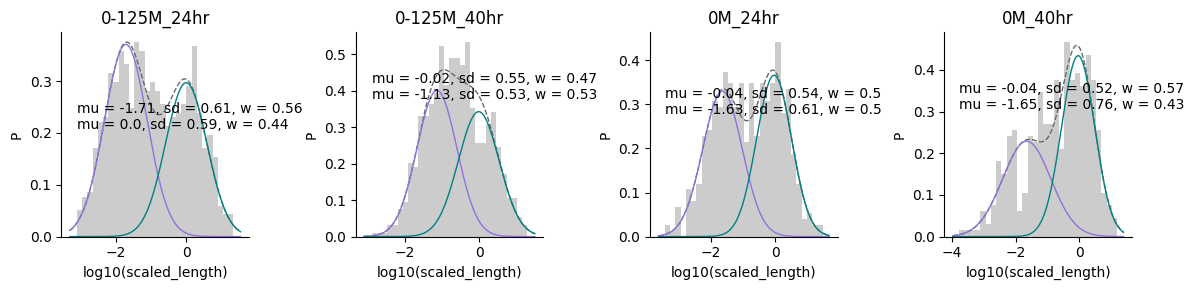

In [6]:
qOI = qOIs[qSlct]
fig, M_best = plot_trip_distribution_fit(per_trip_df, qOI, condsOI, otherparams = fitparams, numbins = 30, 
                                 iflog = True, colwidth = 3, rowwidth = 3, alphaval = 0.4, linecols=list(trip_color.values()))
fig.tight_layout()
fig.savefig(op.join(plotDir, 'P_scaled_length_fitGMM_Fig2B_FigS2A.pdf'), dpi=300)

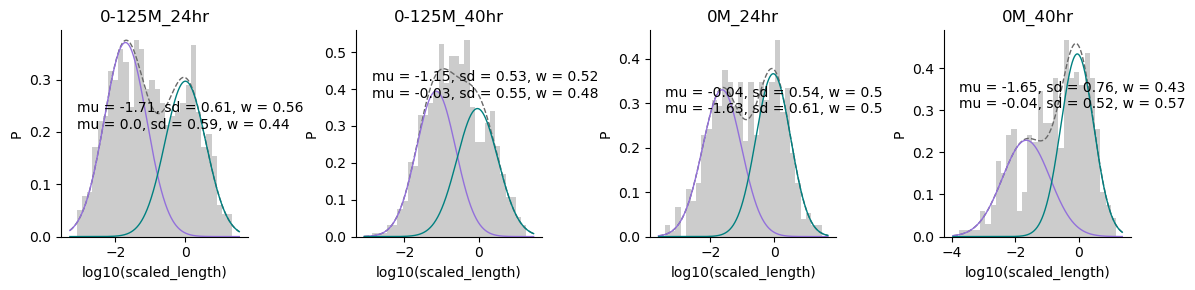

In [30]:
qOI = qOIs[qSlct]
fig, M_best = plot_trip_distribution_fit(per_trip_df, qOI, condsOI, otherparams = fitparams, numbins = 30, 
                                 iflog = True, colwidth = 3, rowwidth = 3, alphaval = 0.4, linecols=list(trip_color.values()))
fig.tight_layout()
fig.savefig(op.join(plotDir, 'P_scaled_length_fitGMM_Fig2B_FigS2A.pdf'), dpi=300)

<a id='fig-2c'></a>
## Fig. 2C, Fig. S2B - Distribution of log-transformed trip lengths for short (purple) and long (teal) trips for 24- and 40-h-starved wildtype flies

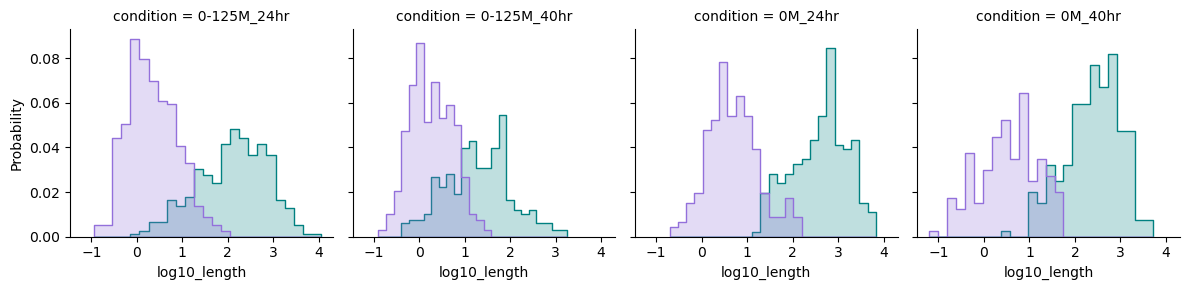

In [31]:
g = sns.FacetGrid(per_trip_df, col="condition")
g.map_dataframe(sns.histplot, x='log10_length', hue="triptype", bins=25, stat='probability', palette=trip_color, element="step", legend=True)
g.savefig(op.join(plotDir, f'tripDistribution_P_log10_length_trvar-{qOIs[qSlct]}_Fig2C_FigS2B.pdf'), dpi=300)

<a id='fig-2d'></a>
## Fig. 2D - Distribution of log-transformed trip lengths for short (purple) and long (teal) trips for 24- and 40-h-starved wildtype flies

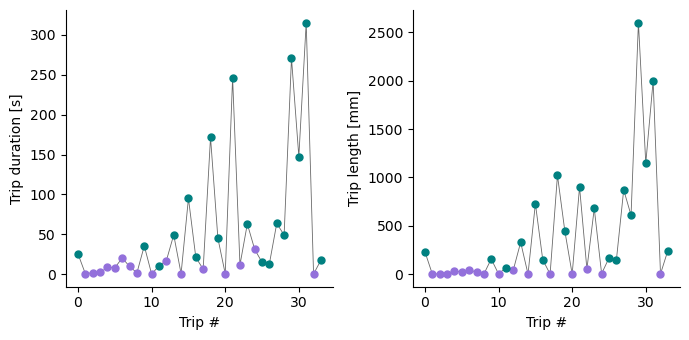

In [29]:
# plot of individual trip length for example fly
cond = condsOI[0]
flyid = 'fly04'
plot_df = per_trip_df.query(f'condition=="{cond}" & flyid=="{flyid}"').reset_index(drop=True)
fig, ax = plt.subplots(1,2,figsize=(7,3.5))
qants = ['duration', 'length']
labs = ['Trip duration [s]','Trip length [mm]']
for i in range(2):
    ax[i].plot(plot_df.trip_index, plot_df[qants[i]], color='dimgrey', linewidth=0.6)
    for t in list(trip_color.keys()):
        ax[i].plot(plot_df[plot_df.triptype == t].trip_index, plot_df[plot_df.triptype == t][qants[i]], 'o', color=trip_color[t], markersize=5)
    ax[i].set_xlabel('Trip #')
    ax[i].set_ylabel(labs[i])
    myAxisTheme(ax[i])
fig.tight_layout()
fig.savefig(plotDir+sep+f'exampleTripDurations_{cond}_{flyid}_trvar-{qOIs[qSlct]}_Fig2D.pdf')

In [32]:
loopcmap = "gnuplot_r"
focuscond = condsOI[0]
print(focuscond)
plot_df = per_trip_df.query(f'condition=="{focuscond}"').reset_index(drop=True)

#loopBins = list(np.arange(1,52,4)) #list(np.arange(1,20,2)) + list(np.arange(20,50,5)) + list(np.arange(50,100,10))
loopBinsShort = list(np.arange(0,25,2)) #list(np.arange(1,20,2)) + list(np.arange(20,35,5)) #+ list(np.arange(50,100,10))

plot_df['index_range'] = pd.cut(plot_df.trip_index, loopBinsShort, right=False) #np.arange(0,31, 2)
plot_df['index_range_fine'] = pd.cut(plot_df.trip_index, np.arange(0,16, 1), right=False)

plot_df['previsit_duration_log10'] = np.log10(plot_df.previsit_duration)
plot_df['postvisit_duration_log10'] = np.log10(plot_df.postvisit_duration)

0-125M_24hr


<a id='fig-2e'></a>
## Fig. 2E, S2E - Probability of long trips as a function of trip index for all trips (2E) and only loops (S2E)

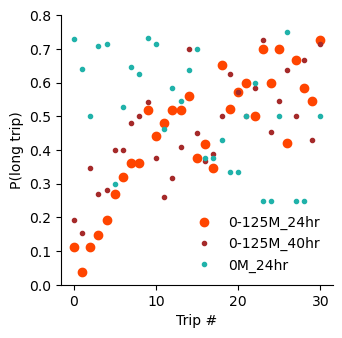

In [47]:
fig, ax = plt.subplots(1,1,figsize=(3.5,3.5))
conds2plot = conditions[0:3]
markerstyle = ['o','.','.','.']
plot_df2 = per_trip_df.query(f'condition in {conds2plot}').reset_index(drop=True)
for c, cond in enumerate(conds2plot):
    tmp = plot_df2.query(f'trip_index <=30 & condition == "{cond}"')[['trip_index','triptype','length']].groupby(['triptype','trip_index']).count().unstack()
    pLongTrip = (tmp.query('triptype == "long"').values/(tmp.query('triptype == "long"').values+tmp.query('triptype == "short"').values))[0]
    ax.plot(np.arange(0,len(pLongTrip)),pLongTrip,markerstyle[c], color=cond_color[cond], label=cond)
    ax.set_xlabel('Trip #')
    ax.set_ylabel('P(long trip)')
    ax.set_ylim(0,0.8)
    ax.legend(frameon=False)
    myAxisTheme(ax)
fig.savefig(plotDir+os.sep+f'probabilityOfLongTrips_trvar-{qOIs[qSlct]}_Fig2E.pdf')

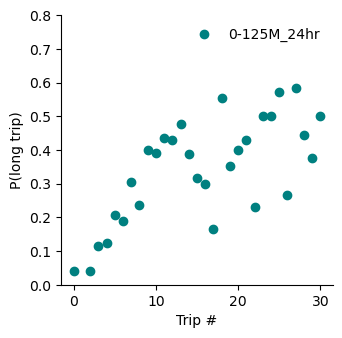

In [57]:
fig, ax = plt.subplots(1,1,figsize=(3.5,3.5))
tmp = plot_df2.query(f'trip_index <=30 & condition == "{conditions[0]}" & isloop==True')[['trip_index','triptype','length']].groupby(['triptype','trip_index']).count().unstack()
pLongTrip = (tmp.query('triptype == "long"').values/(tmp.query('triptype == "long"').values+tmp.query('triptype == "short"').values))[0]
ax.plot(np.arange(0,len(pLongTrip)),pLongTrip,markerstyle[c], color=trip_color['long'], label=conditions[0])
ax.set_xlabel('Trip #')
ax.set_ylabel('P(long trip)')
ax.set_ylim(0,.8)
ax.legend(frameon=False)
myAxisTheme(ax)
fig.savefig(plotDir+os.sep+f'probabilityOfLongTrips_loops_trvar-{qOIs[qSlct]}_FigS2E.pdf')

<a id='fig-2f'></a>
## Fig. 2F, S2C, D - Strip- and boxplot of trip durations binned according to trip index for short (purple) and long (teal) trips for (2F) 24-h-starved, (S2C) 40-h-starved, and (S2D) only loops  

Note that boxplots with less than 8 samples were manually removed

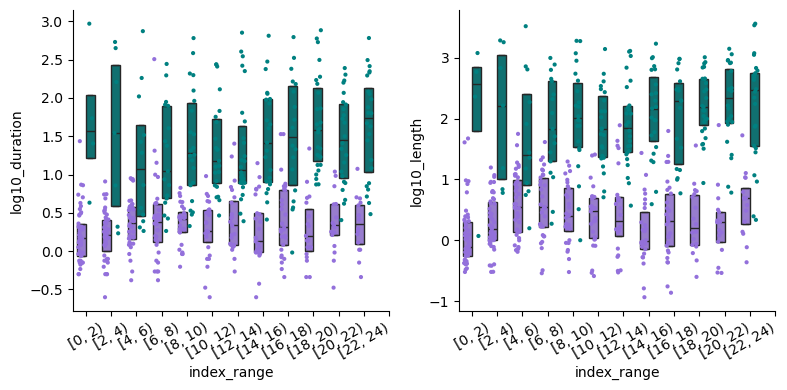

In [37]:
fig, axs = plt.subplots(1,2,figsize=(8,4))
xvals = 'index_range'
sns.boxplot(data = plot_df, x=xvals, y='log10_duration', hue='triptype', ax=axs[0], palette=trip_color, whis=False,
            fliersize=0, width=0.7,legend=False)
sns.stripplot(data = plot_df, x=xvals, y='log10_duration', hue='triptype', ax=axs[0],size=3, 
              jitter=0.2,dodge=True,palette=trip_color,legend=False)

sns.boxplot(data = plot_df, x=xvals, y='log10_length', hue='triptype', ax=axs[1], palette=trip_color, whis=False,
            fliersize=0, width=0.7,legend=False)
sns.stripplot(data = plot_df, x=xvals, y='log10_length', hue='triptype', ax=axs[1], size=3, 
              jitter=0.2,dodge=True,palette=trip_color,legend=False)
for ax in axs:
    myAxisTheme(ax)
    ax.set_xticks(np.arange(len(plot_df[xvals].unique())))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
fig.tight_layout()
fig.savefig(plotDir+os.sep+f'tripScaling_longVsShort_log10_focus{focuscond}_trvar-{qOIs[qSlct]}_Fig2F-FigS2C.pdf')

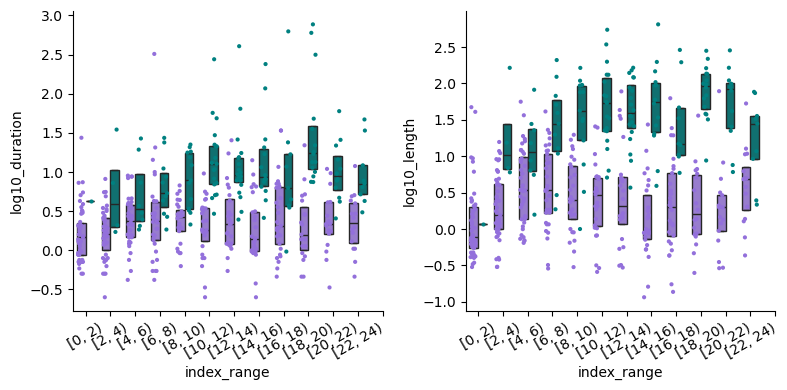

In [39]:
fig, axs = plt.subplots(1,2,figsize=(8,4))
sns.boxplot(data = plot_df.query('isloop==True'), x=xvals, y='log10_duration', hue='triptype', ax=axs[0], palette=trip_color, whis=False,
            fliersize=0, width=0.7,legend=False)
sns.stripplot(data = plot_df.query('isloop==True'), x=xvals, y='log10_duration', hue='triptype', ax=axs[0],size=3, 
              jitter=0.2,dodge=True,palette=trip_color,legend=False)
sns.boxplot(data = plot_df.query('isloop==True'), x=xvals, y='log10_length', hue='triptype', ax=axs[1], palette=trip_color, whis=False,
            fliersize=0, width=0.7,legend=False)
sns.stripplot(data = plot_df.query('isloop==True'), x=xvals, y='log10_length', hue='triptype', ax=axs[1], size=3, 
              jitter=0.2,dodge=True,palette=trip_color,legend=False)
for ax in axs:
    myAxisTheme(ax)
    ax.set_xticks(np.arange(len(plot_df[xvals].unique())))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
fig.tight_layout()
fig.savefig(plotDir+os.sep+f'tripScaling_longVsShort_log10_focus{focuscond}_loops_trvar-{qOIs[qSlct]}_FigS2D.pdf')

<a id='fig-2g'></a>
## Fig. 2G, S2F - Strip- and boxplot of the normalized cumulative feeding duration at the start of a trip, binned by trip index for (2G) 24-h-starved and (S2F) 40-h-starved flies
### Perform regression on trip length vs trip index (like for loops) for short vs long trips
#### Check where norm cummulative feeding crosses 0.5

/Users/hannahhaberkern/Documents/GitHub/foraging-analysis/src/viz.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
/Users/hannahhaberkern/Documents/GitHub/foraging-analysis/src/viz.py:214: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)


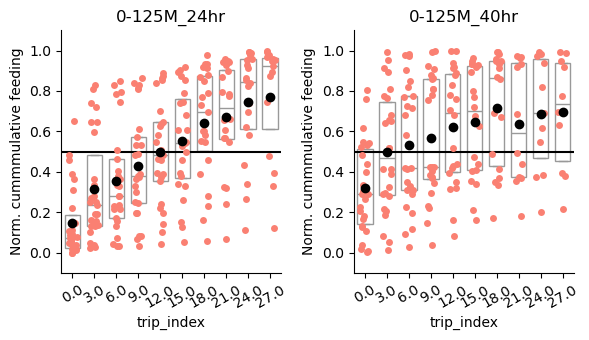

In [60]:
fig, axs = plt.subplots(1,2,figsize=(3*2,3.5))
conds2plot = conditions[:2]
for c, cond in enumerate(conds2plot):
    if len(conditions) == 1: ax = axs
    else: ax = axs[c]
    plot_df = per_trip_df.query(f'condition=="{cond}" & trip_index in {list(np.arange(0,30,3))}').reset_index(drop=True)
    stripWithBoxplot_color(ax, plot_df, 'trip_index', 'norm_cumul_feeding', 'salmon', 'Trip #', (-0.1, 1.1), dotsize=5)
    ax.axhline(0.5,0,1,c='k')
    ax.set_ylabel('Norm. cummmulative feeding')
    myAxisTheme(ax)
    ax.set_title(cond)
fig.tight_layout()
fig.savefig(plotDir+os.sep+f'cummulativeFeeding_by_trip_Fig2F-FigS2F.pdf')

<a id='fig-2h'></a>
## Fig. 2H, I - Scatterplot version of F, with points from short and long trips color-coded for (H) 24-h-starved and (I) 40-h-starved flies

#### Bisect trips based on when cummulative feeding crosses 0.5

Note: In figure the regression lines were removed for the cases where the regression was not significant

                            OLS Regression Results                            
Dep. Variable:           log10_length   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     12.67
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           0.000449
Time:                        21:02:51   Log-Likelihood:                -180.61
No. Observations:                 237   AIC:                             365.2
Df Residuals:                     235   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2030      0.058      3.515      0.0

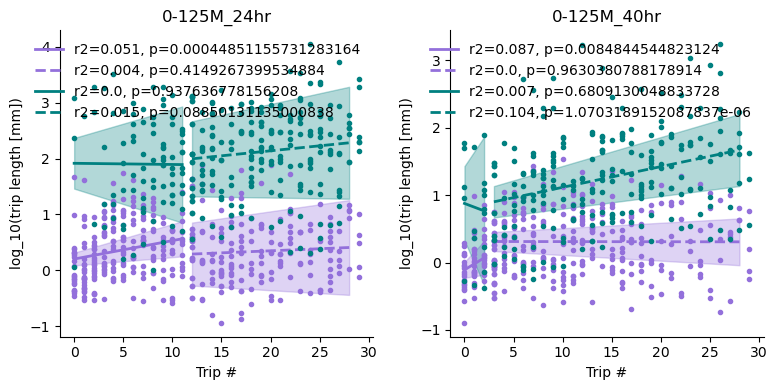

In [63]:
import statsmodels.formula.api as smf
fig, axs = plt.subplots(1,2, figsize=(8,4))
conds2plot = conditions[:2]
ls = ['-','--','-','--']
thresholdtrip = [12,3]
for c, cond in enumerate(conds2plot):
    triprange = [[0,thresholdtrip[c]],[thresholdtrip[c],30],[0,thresholdtrip[c]],[thresholdtrip[c],30]]
    for i, t in enumerate(['short','short','long','long']):
        statsDf = plot_df2.query(f'triptype == "{t}" & log10_length >-20 & condition == "{cond}" & trip_index < 30')[['flyid','log10_length','trip_index']]
        statsDf=statsDf.query(f'trip_index >={triprange[i][0]} &  trip_index <={triprange[i][1]}')
        axs[c].plot(statsDf.trip_index, statsDf.log10_length,'.',color=trip_color[t])
        model = smf.ols(formula=f'log10_length~trip_index', data=statsDf).fit()
        p = model.params
        x = np.arange(np.min(statsDf.trip_index),np.max(statsDf.trip_index))
        # plot regression line on the same axes, set x-axis limits
        print(model.summary())
        axs[c].plot(x, p.Intercept + p.trip_index*x,linewidth=2, linestyle=ls[i],color=trip_color[t], label=f'r2={round(model.rsquared,3)}, p={model.pvalues.trip_index}')
        axs[c].fill_between(x, model.conf_int()[0].Intercept + model.conf_int()[0].trip_index*x, model.conf_int()[1].Intercept + model.conf_int()[1].trip_index*x,
                         alpha=0.3,color=trip_color[t], label='')
        axs[c].set_xlabel('Trip #')
        axs[c].set_ylabel('log_10(trip length [mm])')
    myAxisTheme(axs[c])
    axs[c].set_title(cond)
    axs[c].legend(frameon=False)
fig.tight_layout()
fig.savefig(plotDir+os.sep+f'tripLengthVsIndex_tripTypeComparison_trvar-{qOIs[qSlct]}_Fig2H-I.pdf')

<a id='fig-s2g'></a>
## Fig. S2G - Linear regression plot of the log-transformed trip lengths as a function of log-transformed visit durations

### Relation of trip durtion to feeding

### Connection of trips to previous and following visit duration

In [82]:
plot_df = per_trip_df.query(f'condition=="{focuscond}"').reset_index(drop=True)
loopBinsShort = list(np.arange(0,25,2)) #list(np.arange(1,20,2)) + list(np.arange(20,35,5)) #+ list(np.arange(50,100,10))
plot_df['index_range'] = pd.cut(plot_df.trip_index, loopBinsShort, right=False) #np.arange(0,31, 2)
plot_df['index_range_fine'] = pd.cut(plot_df.trip_index, np.arange(0,16, 1), right=False)
plot_df['previsit_duration_log10'] = np.log10(plot_df.previsit_duration)
plot_df['postvisit_duration_log10'] = np.log10(plot_df.postvisit_duration)

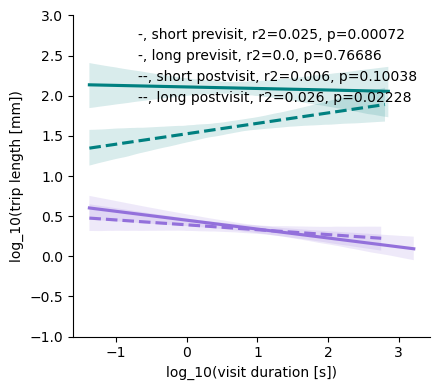

In [88]:
import statsmodels.formula.api as smf
fig, axs = plt.subplots(1,1, figsize=(4.5,4))
ls = ['-','--']
for v, var in enumerate(["previsit_duration_log10","postvisit_duration_log10"]):
    for i, t in enumerate(['short', 'long']):
        statsDf = plot_df.query(f'triptype == "{t}" & log10_length >-20')[['flyid','log10_length',var]]
        model = smf.ols(formula=f'log10_length~{var}', data=statsDf).fit()
        p = model.params
        x = np.arange(np.min(statsDf[var]),np.max(statsDf[var]))
        # plot regression line on the same axes, set x-axis limits
        sns.regplot(ax=axs, data=plot_df.query(f'triptype == "{t}" & log10_length >-10'), y="log10_length", x=var,label=f'{ls[v]}, {t} {var.split("_")[0]}, r2={round(model.rsquared,3)}, p={round(model.pvalues[var],5)}',
                    x_ci='sd',marker='',line_kws=dict(color=trip_color[t],linestyle=ls[v]))
axs.set_xlabel('log_10(visit duration [s])')
axs.set_ylabel('log_10(trip length [mm])')
myAxisTheme(axs)
axs.legend(frameon=False)
axs.set_ylim(-1,3)
fig.tight_layout()
fig.savefig(plotDir+os.sep+f'tripLengthVsVisit_preAndPost_tripTypeComparison_simple_v2_focus{focuscond}_trvar-{qOIs[qSlct]}_FigS2G.pdf')

<a id='fig-s2h'></a>
## Fig. S2H - Probability of long trips as a function of the log-transformed, previous visit duration

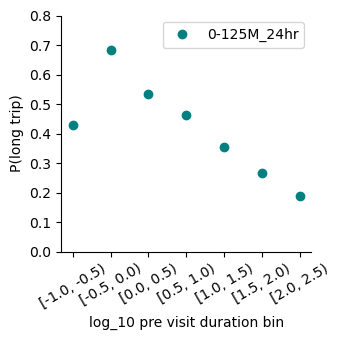

In [92]:
fig, ax = plt.subplots(1,1,figsize=(3.5,3.5))
markerstyle = ['o','.','.','.']
plot_df2 = per_trip_df.query(f'condition =="{conditions[0]}"').reset_index(drop=True)
plot_df2['previsit_duration_log10'] = np.log10(plot_df2.previsit_duration)
plot_df2['postvisit_duration_log10'] = np.log10(plot_df2.postvisit_duration)
plot_df2['previsit_duration_log10_index'] = pd.cut(plot_df2.previsit_duration_log10, np.arange(-1,3,0.5), right=False)
tmp = plot_df2.query(f'trip_index <=30 & condition == "{cond}"')[['previsit_duration_log10_index','triptype','length']].groupby(['triptype','previsit_duration_log10_index'],observed=False).count().unstack()
pLongTrip = (tmp.query('triptype == "long"').values/(tmp.query('triptype == "long"').values+tmp.query('triptype == "short"').values))[0]
tmp = tmp.droplevel(axis=1, level=0).reset_index()
ax.plot(np.arange(0,len(pLongTrip)),pLongTrip,markerstyle[c], color=trip_color['long'], label=cond)
ax.set_xlabel('log_10 pre visit duration bin')
ax.set_ylabel('P(long trip)')
ax.set_xticks(np.arange(0,len(pLongTrip)))
ax.set_xticklabels(tmp.columns[1:], rotation=30)
ax.set_ylim(0,0.8)
ax.legend()#frameon=False)
myAxisTheme(ax)
fig.tight_layout()
fig.savefig(plotDir+os.sep+f'probabilityOfLongTrips_forPreVisitDuration_trvar-{qOIs[qSlct]}_FigS2H.pdf')